In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import Data 
source = '/Users/Administrator/Desktop/'
datafile = pd.read_csv(source + 'ACME-HappinessSurvey2020.csv')
dset = pd.DataFrame(datafile)
#displaying data
dset.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
# abtaining information about the dataset
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [4]:
# looking into statistical data properties
dset.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Exploratory Data Analysis for this dataset

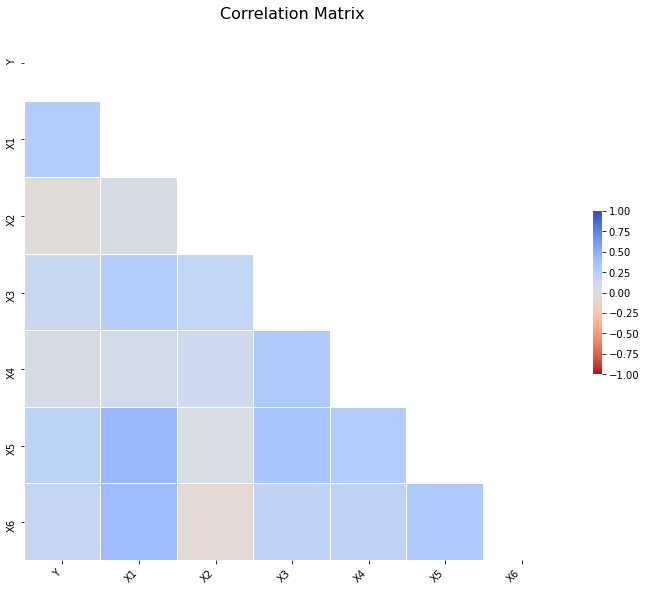

In [5]:
import seaborn as sns
#plot a correlation matrix
plt.figure(figsize=(12,10))
corr = dset.corr()
#plt.rcParams["figure.figsize"] = (10,10)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
cmap='coolwarm_r',    
mask=mask, 
square=True,    
linewidths=.3,
cbar_kws={"shrink": .3},   
)

ax.set_xticklabels(

    ax.get_xticklabels(),

    rotation=45,

    horizontalalignment='right'

);


plt.title('Correlation Matrix', fontsize=16);

In [6]:
dset['Y'].value_counts()

1    69
0    57
Name: Y, dtype: int64

# Data Engineering

In [7]:
#x and y axes input data
y = dset['Y']
x =  dset.drop(['Y'], axis = 1)

In [8]:
Happy = dset[dset['Y']==1]

Unhappy = dset[dset['Y']==0]
X = np.array(x)
Y = np.array(dset['Y'])

In [9]:
# Split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Model 

In [10]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(i) for i in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(j) for j in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [11]:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(max_depth=10, random_state=0)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   19.8s finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=10,
                                                    random_state=0),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [12]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

Next I evaluate each model performance for overfitting problem  detection

In [14]:
def evaluate(rf_random, X_test, y_test):
    predictions = rf_random.predict(X_test)
    errors = abs(predictions - len(y_test))
    mape = 100 * np.mean(errors / len(y_test))
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [40]:

scoretest = rf_random.score(X_test, y_test)
    
print('Model Performance')
    
print('Accuracy = {:0.2f}%.'.format(scoretest))


Model Performance
Accuracy = 0.58%.


In [41]:
scoretrain = rf_random.score(X_train, y_train)
    
print('Model Performance')
    
print('Accuracy = {:0.2f}%.'.format(scoretrain))


Model Performance
Accuracy = 0.90%.


In [29]:
best_random = rf_random.best_estimator_
best_random

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5,
                       n_estimators=1400, random_state=0)

In [30]:
from sklearn.metrics import classification_report
predictions = best_random.predict(X_train)

print(classification_report(y_train, predictions))



              precision    recall  f1-score   support

           0       0.92      0.83      0.88        42
           1       0.89      0.95      0.92        58

    accuracy                           0.90       100
   macro avg       0.90      0.89      0.90       100
weighted avg       0.90      0.90      0.90       100



In [31]:
from sklearn.metrics import classification_report
prediction = best_random.predict(X_test)

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.67      0.53      0.59        15
           1       0.50      0.64      0.56        11

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.58        26
weighted avg       0.60      0.58      0.58        26



In [42]:
print('Improvement of {:0.2f}%.'.format( 100 * (scoretest - scoretrain) / scoretrain))

Improvement of -35.90%.


Next, I analyze what features are important  and remove if any not related to Happiness or Unhappiness of the customer. I give this job to identify to Python sklearn packages. 

In [34]:
importances = best_random.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_random.estimators_], axis=0)

In [35]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]

In [24]:
best_random.feature_importances_

array([0.20104592, 0.15297228, 0.15603037, 0.11563973, 0.22571362,
       0.14859808])

<BarContainer object of 6 artists>

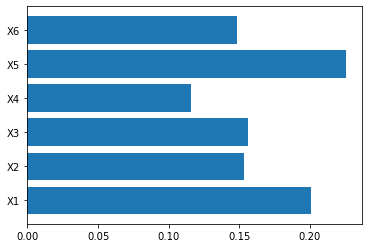

In [46]:
dset = pd.DataFrame(datafile, index=['X1','X2','X3','X4','X5','X6'],  columns=index)
plt.barh(dset.index, best_random.feature_importances_)

In [38]:
from sklearn.feature_selection import RFE
rf = RandomForestClassifier(max_depth=10, random_state=0)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model

selector = RFE(best_random, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
selector.support_


selector.ranking_


array([3, 2, 1, 4, 1, 1])

In [39]:
for i in range(X_test.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, selector.support_[i], selector.ranking_[i]))

Column: 0, Selected False, Rank: 3.000
Column: 1, Selected False, Rank: 2.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 4.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000


All of the features has been selected in this case.

# Model overfitting detection and testing

In [40]:
# define the tree depths to evaluate
values = [i for i in range(1, 21)]

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
train_scores = []
test_scores = []
for i in values:
    # configure the model
    rf = RandomForestClassifier(max_depth=10, random_state=0)
    # fit model on the training dataset
    rf.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = rf.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = rf.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.950, test: 0.692
>2, train: 0.950, test: 0.692
>3, train: 0.950, test: 0.692
>4, train: 0.950, test: 0.692
>5, train: 0.950, test: 0.692
>6, train: 0.950, test: 0.692
>7, train: 0.950, test: 0.692
>8, train: 0.950, test: 0.692
>9, train: 0.950, test: 0.692
>10, train: 0.950, test: 0.692
>11, train: 0.950, test: 0.692
>12, train: 0.950, test: 0.692
>13, train: 0.950, test: 0.692
>14, train: 0.950, test: 0.692
>15, train: 0.950, test: 0.692
>16, train: 0.950, test: 0.692
>17, train: 0.950, test: 0.692
>18, train: 0.950, test: 0.692
>19, train: 0.950, test: 0.692
>20, train: 0.950, test: 0.692


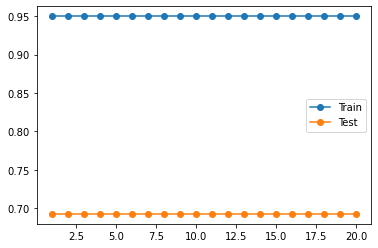

In [43]:
# plot of train and test scores vs tree depth
import matplotlib.pyplot as plt
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()